# U.S. Medical Insurance Costs

The goal of this project is to showcase knowledge of Python basics to analyze a .CSV that contains US medical insurance costs and related factors. The project will be broken down into 3 separate parts:

1. Importing the file and creating the class and methods necessary to analyze the data.
2. Analyzing the data to determine what this data describes.
3. Using the data to answer questions a business might have about the data.

# Importing the File and Creating The Class

We'll need to import the .csv and create a couple of methods to help us better analyze the contents of the file. The methods can be used in the future when we get new csvs to quickly repeat the work we do here.

In [33]:
import csv
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics
import numpy
from scipy.stats import skew


class MedicalData:
    def __init__(self, file):
        with open(file, newline='') as insurancecsv:
            insurance_data = csv.DictReader(insurancecsv)
            data = list(insurance_data)
        self.data = data 
        self.ages = [row["age"] for row in data]
        self.sexes = [row["sex"] for row in data]
        self.bmis = [row['bmi'] for row in data]
        self.children = [row['children'] for row in data]
        self.smokers = [row['smoker'] for row in data]
        self.regions = [row['region'] for row in data]
        self.charges = [row['charges'] for row in data]
    
    def visualize_ages(self):
        temp = self.ages
        temp.sort()
        df_ages = pd.DataFrame(temp, columns=['Age'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_ages['Age'], kde=False, bins=range(int(df_ages['Age'].min()), int(df_ages['Age'].max()) + 2, 1), color='blue')
        plt.xticks(rotation=90)
        plt.title('Age Distribution')
        plt.xlabel('Age')
        plt.ylabel('Frequency')
        plt.show()
        return
    
    def visualize_sexes(self):
        df_sexes = pd.DataFrame(self.sexes, columns=['Sex'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_sexes['Sex'])
        plt.title('Sex Distribution')
        plt.xlabel('Sex')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_bmis(self):
        floored_bmis = [math.floor(float(row)) for row in self.bmis]
        df_bmis = pd.DataFrame(floored_bmis, columns=['BMI'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_bmis['BMI'],kde=True, bins=38, color='blue')
        plt.title('BMI Distribution')
        plt.xlabel('BMI Bucket')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_children(self):
        temp = self.children
        temp.sort()
        df_children = pd.DataFrame(temp, columns=['Children'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_children['Children'],kde=False, bins=6, color='blue')
        plt.title('Children Distribution')
        plt.xlabel('Children')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_smokers(self):
        df_smokers = pd.DataFrame(self.smokers, columns=['Smoker'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_smokers['Smoker'],kde=False, bins=2, color='blue')
        plt.title('Smoker Distribution')
        plt.xlabel('Smoker')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_regions(self):
        df_regions = pd.DataFrame(self.regions, columns=['Sex'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_regions['Sex'])
        plt.title('Region Distribution')
        plt.xlabel('Region')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_charges(self):
        bucketed_charges = [(math.floor(float(row)/100)*100) for row in self.charges]
        df_charges = pd.DataFrame(bucketed_charges, columns=['Charges'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_charges['Charges'], kde=False, bins=range(min(bucketed_charges),max(bucketed_charges) + 1, 100), color='blue')
        plt.title('Charges Distribution')
        plt.xlabel('Charge (Bucketed in groups of $100) ($)')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_all(self):
        self.visualize_ages()
        self.visualize_sexes()
        self.visualize_bmis()
        self.visualize_children()
        self.visualize_smokers()
        self.visualize_regions()
        self.visualize_charges()
        return

    def analyze_ages(self):
        #Making a dictionary where the index is an integer representing age, and the value is the count of that age in the .csv.
        age_dict = {}
        for age in self.ages:
            if int(age) in age_dict:
                age_dict[int(age)] += 1
            else:
                age_dict[int(age)] = 1
        #Making a sorted list of the ages as integers. This will make calculations of various statistics easier
        sorted_ages = [int(age) for age in self.ages]
        sorted_ages.sort()
        print(f"There are {len(self.ages)} total people in the data set")
        print(f"Age range: {min(sorted_ages)} - {max(sorted_ages)}")
        print(f"Average (mean) age is: {round(sum(int(age) for age in self.ages)/len(self.ages),0)}")
        print(f"Median age is: {statistics.median(sorted_ages)}")
        print(f"Mode (most frequently occuring age) of age is: {statistics.mode(sorted_ages)}")
        print(f"18-19: {round(sum(age_dict.get(age, 0) for age in range(18, 20))/len(self.ages)*100,2)}%")
        print(f"20-29: {round(sum(age_dict.get(age, 0) for age in range(20, 30))/len(self.ages)*100,2)}%")
        print(f"30-39: {round(sum(age_dict.get(age, 0) for age in range(30, 40))/len(self.ages)*100,2)}%")
        print(f"40-49: {round(sum(age_dict.get(age, 0) for age in range(40, 50))/len(self.ages)*100,2)}%")
        print(f"50-59: {round(sum(age_dict.get(age, 0) for age in range(50, 60))/len(self.ages)*100,2)}%")
        print(f"60-69: {round(sum(age_dict.get(age, 0) for age in range(60, 70))/len(self.ages)*100,2)}%")
        print(f"70-79: {round(sum(age_dict.get(age, 0) for age in range(70, 80))/len(self.ages)*100,2)}%")
        print(f"80-89: {round(sum(age_dict.get(age, 0) for age in range(80, 90))/len(self.ages)*100,2)}%")
        return 


    def analyze_sexes(self):
        print(f"Male: {self.sexes.count('male')} ({round(self.sexes.count('male')/len(self.sexes)*100, 2)}%)")
        print(f"Female: {self.sexes.count('female')} ({round(self.sexes.count('female')/len(self.sexes)*100, 2)}%)")
        return 

    def analyze_bmis(self):
        sorted_bmis = [float(bmi) for bmi in self.bmis]
        sorted_bmis.sort()
        print(f"BMI range: {min(sorted_bmis)} - {max(sorted_bmis)}")
        print(f"Average (Mean) BMI is: {round((sum(float(bmi) for bmi in self.bmis))/len(self.bmis), 2)}")
        print(f"Median BMI is: {statistics.median(sorted_bmis)}")
        print(f"Standard Deviation: {statistics.stdev(sorted_bmis)}")
        print(f"Interquartile Range: {numpy.percentile(sorted_bmis, 75) - numpy.percentile(sorted_bmis, 25)}")        
        return 

    def analyze_children(self):
        sorted_children = [int(children) for children in self.children]
        sorted_children.sort()
        print(f"Average (mean) children is: {round(sum(sorted_children)/len(sorted_children), 2)}")
        print(f"Median children is: {statistics.median(sorted_children)}")
        for number in set(sorted_children):
            print(f"{number} Children: {round((sorted_children.count(number)/len(sorted_children))*100, 2)}%")
        return 

    def analyze_smokers(self):
        print(f"Non-smokers: {round(self.smokers.count("no")/len(self.smokers)*100,2)}%")
        print(f"Smokers: {round(self.smokers.count("yes")/len(self.smokers)*100,2)}%")
        return 

    def analyze_regions(self):
        for region in set(self.regions):
            print(f"{region.capitalize()}: {round((self.regions.count(region)/len(self.regions))*100,2)}%")
        return 

    def analyze_charges(self):
        sorted_charges = [round(float(charge),2) for charge in self.charges]
        sorted_charges.sort()
        print(f"Charge range: ${min(sorted_charges)} - ${max(sorted_charges)}")
        print(f"Average (mean) charge: ${round(sum(sorted_charges)/len(sorted_charges),2)}")
        print(f"Median charge: ${round(statistics.median(sorted_charges), 2)}")
        print(f"Skewness: {skew(sorted_charges)}")
        print(f"Standard Deviation: {statistics.stdev(sorted_charges)}")
        print(f"Interquartile Range: {numpy.percentile(sorted_charges, 75) - numpy.percentile(sorted_charges, 25)}")   
        return 

    def analyze_all(self):
        self.analyze_ages()
        self.analyze_sexes()
        self.analyze_bmis()
        self.analyze_children()
        self.analyze_smokers()
        self.analyze_regions()
        self.analyze_charges()
        return
    
    def analyze_and_visualize_all(self):
        self.analyze_ages()
        self.visualize_ages()
        self.analyze_sexes()
        self.visualize_sexes()
        self.analyze_bmis()
        self.visualize_bmis()
        self.analyze_children()
        self.visualize_children()
        self.analyze_smokers()
        self.visualize_smokers()
        self.analyze_regions()
        self.visualize_regions()
        self.analyze_charges()
        self.visualize_charges()
        return

insurance_data = MedicalData("insurance.csv")

# Analyzing the Data and Describing our Data Set

Now that we've got all our class methods, let's run them and see what is contained in this data set and if there's anything noteworthy.

There are 1338 total people in the data set
Age range: 18 - 64
Average (mean) age is: 39.0
Median age is: 39.0
Mode (most frequently occuring age) of age is: 18
18-19: 10.24%
20-29: 20.93%
30-39: 19.21%
40-49: 20.85%
50-59: 20.25%
60-69: 8.52%
70-79: 0.0%
80-89: 0.0%


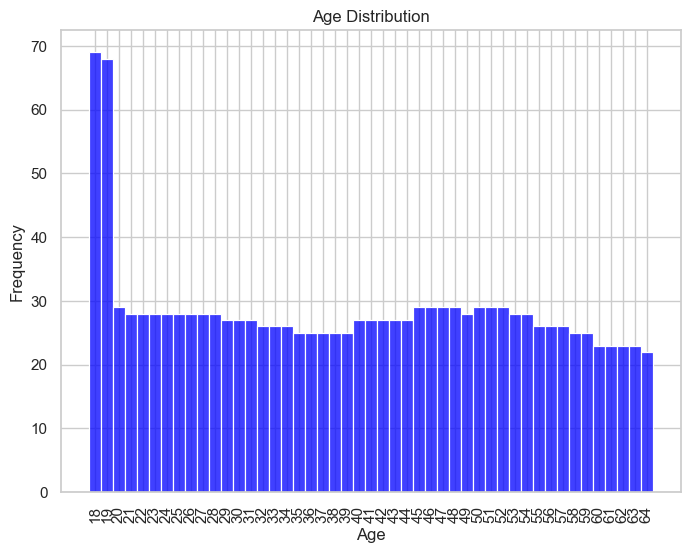

Male: 676 (50.52%)
Female: 662 (49.48%)


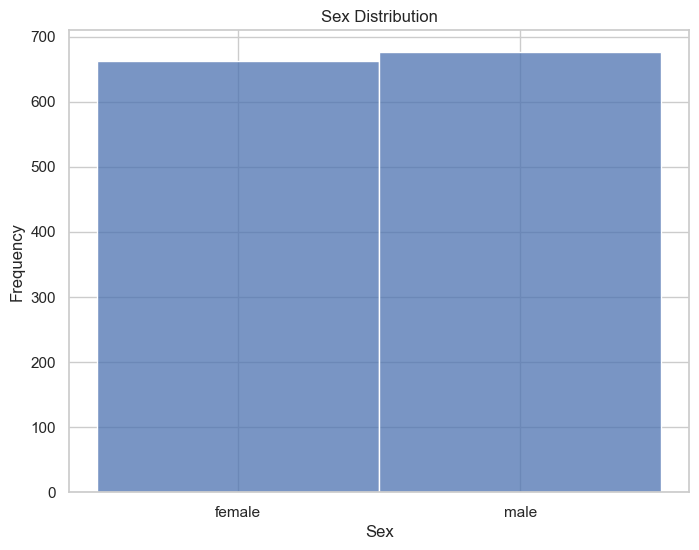

BMI range: 15.96 - 53.13
Average (Mean) BMI is: 30.66
Median BMI is: 30.4
Standard Deviation: 6.098186911679014
Interquartile Range: 8.3975


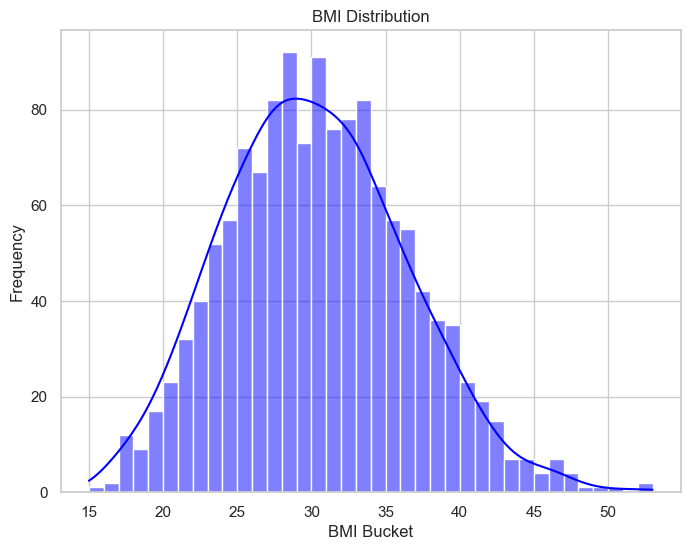

Average (mean) children is: 1.09
Median children is: 1.0
0 Children: 42.9%
1 Children: 24.22%
2 Children: 17.94%
3 Children: 11.73%
4 Children: 1.87%
5 Children: 1.35%


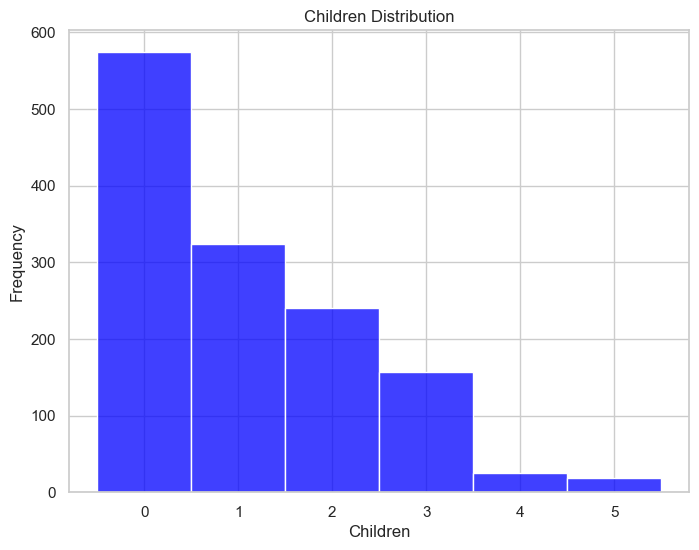

Non-smokers: 79.52%
Smokers: 20.48%


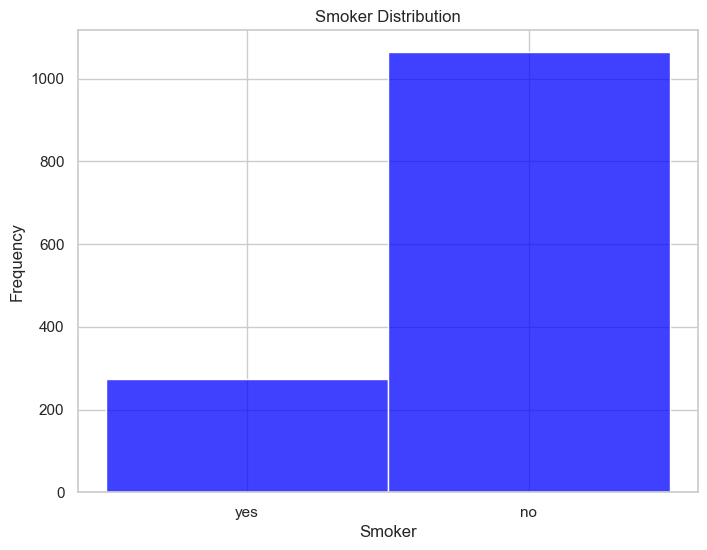

Northwest: 24.29%
Southeast: 27.2%
Southwest: 24.29%
Northeast: 24.22%


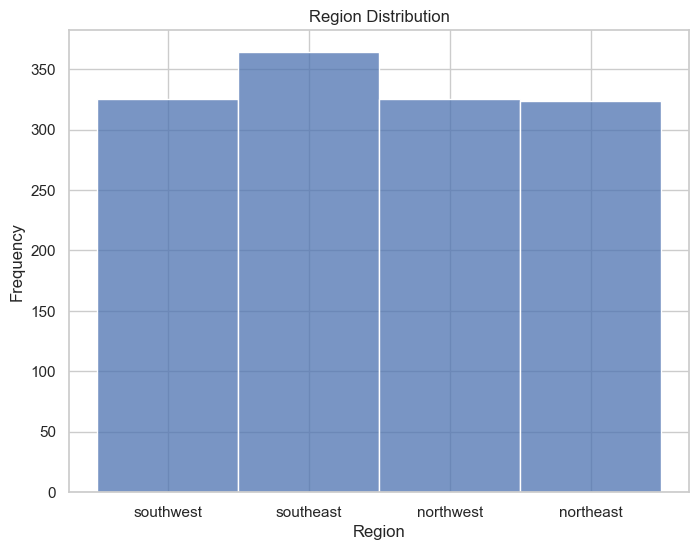

Charge range: $1121.87 - $63770.43
Average (mean) charge: $13270.42
Median charge: $9382.03
Skewness: 1.514179723322785
Standard Deviation: 12110.011272350186
Interquartile Range: 11899.6275


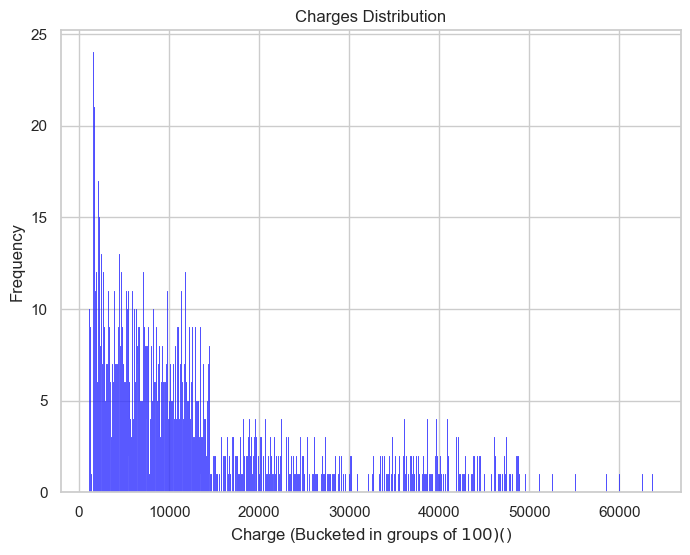

In [34]:
insurance_data.analyze_and_visualize_all()

So what does this mean for our data set? There are a couple of ways we could describe it.

- Ages are fairly evenly distributed, however there's a high number of people who are 18 and 19 compared to other ages
- Both sexes are evenly represented in the data, though that may not be true when looking at specific other properties (for example, smokers)
- BMI is a normal distribution, with 2/3 of the data set lying between a BMI of 23 and 36
- Most people in the data set have at least one child, though the most frequent number of children is 0
- The data set is heavily skewed towards non-smokers, with smokers only representing 20% of the data.
- Regions are all equally represented, with the southeast region being slightly more common than the others.
- Charges are very right skewed, with roughly 2/3 of all charges being between $1160 and $25380. There is a long tail of charges up to $63000.

# Answering Business Questions

That we've got a pretty solid grasp on the data, let's use it to try and answer two business questions. The first question is pretty straightforward.

- Are people having less children now than previously?

For the second question, I'm imagining working at a small insurance company that's setting up a website to give quotes and estimates to new customers. They've noticed that customers absolutely *hate* filling out surveys to try and get an estimate, and that after filling out 2 questions most customers leave the website, never to return. With this information, they want to see if there's an easier way for us to estimate their costs in a meaningful way. Put more concisely:

- Can we ask a potential customer only 2 pieces of information and give them a reasonable cost estimate?

## Are People Having Less Children Now

## Can We Estimate Costs With Only 2 Pieces of Information?

In [35]:
# df = pd.DataFrame(data[1:], columns=data[0])
# df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
# correlation_matrix = df_encoded.corr()
# correlation_with_cost = correlation_matrix['charges'].drop('charges')
# print(correlation_with_cost)//

Looking at the correlation, we can see that being a smoker has the strongest correlation with a coefficient of 0.78. If you're a smoker, that greatly increases your insurance costs to nobody's surprise.

Age and BMI also have weak correlations.

Surprisingly, children has almost no correlation, as do the various regions

So that makes me wonder, how accurately can I predict somebody's insurance costs using only their age and if they're a smoker?

In [36]:
smokers_numerical = [1 if row =="yes" else 0 for row in smokers]
print(smokers)
print(smokers_numerical)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.DataFrame(data[1:], columns=data[0])
df['smoker'] = df['smoker'].apply(lambda x:1 if x == 'yes' else 0)
X = df[['age', 'smoker']]
Y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Print the model coefficients
print(f'Model Coefficients (age, smoker): {model.coef_}')
print(f'Intercept: {model.intercept_}')

NameError: name 'smokers' is not defined

The R^2 is pretty good, meaning this model explains 72% of the variance in the cost of health insurance! However, the MSE is REALLY high, which is likely due to the wildly different insurance costs. These range from 1100 to 63000 in the data set. A $500 difference at a cost of 1100 is MASSIVE compared to at the 63000 range.